# Analyse de la concentration de CO2 dans l'atmosphère depuis 1958

In [1]:
 %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import requests
import os

## Préparation des données

 Les données de concentration du CO2 sont disponibles du site [Scripps CO2 Program](https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html). Nous téléchargeons les données le 07 mai 2022 à 09:32. 

In [2]:
csv_name = "monthly_in_situ_co2_mlo.csv"
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/" + csv_name
file_exists = os.path.exists(csv_name)
if not file_exists:
    print('file doesnt exist: dowloading')
    r = requests.get(data_url)
    data = r.text
    with open(csv_name, "w", encoding='UTF-8') as text_file:
        text_file.write(data)

with open(csv_name, "rb") as text_file:
    print(text_file.readlines())

[b'"-------------------------------------------------------------------------------------------"\n', b'" Atmospheric CO2 concentrations (ppm) derived from in situ air measurements                "\n', b'" at Mauna Loa, Observatory, Hawaii: Latitude 19.5\xc3\x82\xc2\xb0N Longitude 155.6\xc3\x82\xc2\xb0W Elevation 3397m      "\n', b'"                                                                                           "\n', b'" Source: R. F. Keeling, S. J. Walker, S. C. Piper and A. F. Bollenbacher                   "\n', b'" Scripps CO2 Program ( http://scrippsco2.ucsd.edu )                                        "\n', b'" Scripps Institution of Oceanography (SIO)                                                 "\n', b'" University of California                                                                  "\n', b'" La Jolla, California USA 92093-0244                                                       "\n', b'"                                                                  

Nous chargeons le jeu de données dans une DataFrame à l'aide de Pandas.

In [3]:
raw_data = pd.read_csv(csv_name, encoding = 'UTF-8', comment='"', index_col=False)

On ajuste les noms de la première colonne pour compléter les noms et s'y retrouver.

In [4]:
data = raw_data.copy()

In [5]:
column_names = raw_data.columns.values
column_names
first_row = raw_data.iloc[0].values
first_row
new_columns = []
for (item1, item2) in zip(column_names, first_row):
    item1 = item1.strip()
    item2 = item2.strip()
    new_name = item1
    if item2 != '':
        new_name += ' ' + item2
    new_columns.append(new_name)
print(new_columns)
len(new_columns)

['Yr', 'Mn', 'Date', 'Date', 'CO2', 'seasonally adjusted', 'fit', 'seasonally adjusted fit', 'CO2 filled', 'seasonally adjusted filled']


10

On remplace les titres des colonnes.

In [6]:
data.columns = new_columns

In [7]:
data

Yr   Mn      Date        Date        CO2 seasonally adjusted  \
0                                                          adjusted   
1                  Excel                  [ppm]              [ppm]    
2    1958   01     21200   1958.0411     -99.99              -99.99   
3    1958   02     21231   1958.1260     -99.99              -99.99   
4    1958   03     21259   1958.2027     315.71              314.44   
5    1958   04     21290   1958.2877     317.45              315.16   
6    1958   05     21320   1958.3699     317.51              314.70   
7    1958   06     21351   1958.4548     -99.99              -99.99   
8    1958   07     21381   1958.5370     315.86              315.20   
9    1958   08     21412   1958.6219     314.93              316.21   
10   1958   09     21443   1958.7068     313.21              316.10   
11   1958   10     21473   1958.7890     -99.99              -99.99   
12   1958   11     21504   1958.8740     313.33              315.20   
13   1958   12     21534   1958.9562     314.67              315.43   
14   1959   01     21565   1959.0411     315.58              315.52   
15   1959   02     21596   1959.1260     316.49              315.84   
16   1959   03     21624   1959.2027     316.65              315.37   
17   1959   04     21655   1959.2877     317.72              315.42   
18   1959   05     21685   1959.3699     318.29              315.48   
19   1959   06     21716   1959.4548     318.15              316.02   
20   1959   07     21746   1959.5370     316.54              315.87   
21   1959   08     21777   1959.6219     314.80              316.08   
22   1959   09     21808   1959.7068     313.84              316.74   
23   1959   10     21838   1959.7890     313.33              316.33   
24   1959   11     21869   1959.8740     314.81              316.69   
25   1959   12     21899   1959.9562     315.58              316.35   
26   1960   01     21930   1960.0410     316.43              316.37   
27   1960   02     21961   1960.1257     316.98              316.33   
28   1960   03     21990   1960.2049     317.58              316.27   
29   1960   04     22021   1960.2896     319.03              316.70   
..    ...  ...       ...         ...        ...                 ...   
752  2020   07     44027   2020.5383     414.42              413.64   
753  2020   08     44058   2020.6230     412.52              414.10   
754  2020   09     44089   2020.7077     411.18              414.69   
755  2020   10     44119   2020.7896     411.12              414.73   
756  2020   11     44150   2020.8743     412.88              415.15   
757  2020   12     44180   2020.9563     413.89              414.81   
758  2021   01     44211   2021.0411     415.15              415.08   
759  2021   02     44242   2021.1260     416.47              415.69   
760  2021   03     44270   2021.2027     417.16              415.62   
761  2021   04     44301   2021.2877     418.24              415.46   
762  2021   05     44331   2021.3699     418.95              415.55   
763  2021   06     44362   2021.4548     418.70              416.12   
764  2021   07     44392   2021.5370     416.65              415.84   
765  2021   08     44423   2021.6219     414.34              415.89   
766  2021   09     44454   2021.7068     412.90              416.42   
767  2021   10     44484   2021.7890     413.55              417.17   
768  2021   11     44515   2021.8740     414.82              417.09   
769  2021   12     44545   2021.9562     416.43              417.36   
770  2022   01     44576   2022.0411     418.01              417.94   
771  2022   02     44607   2022.1260     418.99              418.20   
772  2022   03     44635   2022.2027     418.45              416.90   
773  2022   04     44666   2022.2877     420.02              417.23   
774  2022   05     44696   2022.3699     -99.99              -99.99   
775  2022   06     44727   2022.4548     -99.99              -99.99   
776  2022   07     44757   2022

On peut maintenant retirer les deux premières lignes et réindexer la DataFrame.

In [8]:
data = data.iloc[2:].reset_index(drop=True)

In [9]:
data

Yr   Mn      Date        Date        CO2 seasonally adjusted  \
0    1958   01     21200   1958.0411     -99.99              -99.99   
1    1958   02     21231   1958.1260     -99.99              -99.99   
2    1958   03     21259   1958.2027     315.71              314.44   
3    1958   04     21290   1958.2877     317.45              315.16   
4    1958   05     21320   1958.3699     317.51              314.70   
5    1958   06     21351   1958.4548     -99.99              -99.99   
6    1958   07     21381   1958.5370     315.86              315.20   
7    1958   08     21412   1958.6219     314.93              316.21   
8    1958   09     21443   1958.7068     313.21              316.10   
9    1958   10     21473   1958.7890     -99.99              -99.99   
10   1958   11     21504   1958.8740     313.33              315.20   
11   1958   12     21534   1958.9562     314.67              315.43   
12   1959   01     21565   1959.0411     315.58              315.52   
13   1959   02     21596   1959.1260     316.49              315.84   
14   1959   03     21624   1959.2027     316.65              315.37   
15   1959   04     21655   1959.2877     317.72              315.42   
16   1959   05     21685   1959.3699     318.29              315.48   
17   1959   06     21716   1959.4548     318.15              316.02   
18   1959   07     21746   1959.5370     316.54              315.87   
19   1959   08     21777   1959.6219     314.80              316.08   
20   1959   09     21808   1959.7068     313.84              316.74   
21   1959   10     21838   1959.7890     313.33              316.33   
22   1959   11     21869   1959.8740     314.81              316.69   
23   1959   12     21899   1959.9562     315.58              316.35   
24   1960   01     21930   1960.0410     316.43              316.37   
25   1960   02     21961   1960.1257     316.98              316.33   
26   1960   03     21990   1960.2049     317.58              316.27   
27   1960   04     22021   1960.2896     319.03              316.70   
28   1960   05     22051   1960.3716     320.03              317.21   
29   1960   06     22082   1960.4563     319.58              317.46   
..    ...  ...       ...         ...        ...                 ...   
750  2020   07     44027   2020.5383     414.42              413.64   
751  2020   08     44058   2020.6230     412.52              414.10   
752  2020   09     44089   2020.7077     411.18              414.69   
753  2020   10     44119   2020.7896     411.12              414.73   
754  2020   11     44150   2020.8743     412.88              415.15   
755  2020   12     44180   2020.9563     413.89              414.81   
756  2021   01     44211   2021.0411     415.15              415.08   
757  2021   02     44242   2021.1260     416.47              415.69   
758  2021   03     44270   2021.2027     417.16              415.62   
759  2021   04     44301   2021.2877     418.24              415.46   
760  2021   05     44331   2021.3699     418.95              415.55   
761  2021   06     44362   2021.4548     418.70              416.12   
762  2021   07     44392   2021.5370     416.65              415.84   
763  2021   08     44423   2021.6219     414.34              415.89   
764  2021   09     44454   2021.7068     412.90              416.42   
765  2021   10     44484   2021.7890     413.55              417.17   
766  2021   11     44515   2021.8740     414.82              417.09   
767  2021   12     44545   2021.9562     416.43              417.36   
768  2022   01     44576   2022.0411     418.01              417.94   
769  2022   02     44607   2022.1260     418.99              418.20   
770  2022   03     44635   2022.2027     418.45              416.90   
771  2022   04     44666   2022.2877     420.02              417.23   
772  2022   05     44696   2022.3699     -99.99              -99.99   
773  2022   06     44727   2022.4548     -99.99              -99.99   
774  2022   07     44757   2022

## Inspection et traitement des données brutes

On peut déjà voir que les données manquantes sont représentées par "-99.99". On remplace d'abord celles-ci par np.Nan

In [10]:
data.iloc[779].values

array(['2022', ' 12', '   44910', ' 2022.9562', '   -99.99', '   -99.99',
       '     -99.99', '   -99.99', '     -99.99', '   -99.99'],
      dtype=object)

Il y a des espaces à retirer: on utilise une fonctions.

In [11]:
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

On regarde à nouveau la même ligne.

In [12]:
data.iloc[779].values

array(['2022', '12', '44910', '2022.9562', '-99.99', '-99.99', '-99.99',
       '-99.99', '-99.99', '-99.99'], dtype=object)

Maintenant, on replace '-99.99' par np.nan.

In [13]:
import numpy as np
data = data.replace('-99.99', np.nan)

In [14]:
data.iloc[779].values

array(['2022', '12', '44910', '2022.9562', nan, nan, nan, nan, nan, nan],
      dtype=object)

In [15]:
data.iloc[760].values

array(['2021', '05', '44331', '2021.3699', '418.95', '415.55', '419.23',
       '415.82', '418.95', '415.55'], dtype=object)

Desormais, nous pouvons convertir les colonnes avec le type requis. Nous allons seulement nous concentrer sur les valeurs corrigés de la dernière colonne.

In [16]:
data['seasonally adjusted filled'] = data['seasonally adjusted filled'].astype(float)

In [17]:
data['seasonally adjusted filled']

0         NaN
1         NaN
2      314.44
3      315.16
4      314.70
5      315.14
6      315.20
7      316.21
8      316.10
9      315.40
10     315.20
11     315.43
12     315.52
13     315.84
14     315.37
15     315.42
16     315.48
17     316.02
18     315.87
19     316.08
20     316.74
21     316.33
22     316.69
23     316.35
24     316.37
25     316.33
26     316.27
27     316.70
28     317.21
29     317.46
        ...  
750    413.64
751    414.10
752    414.69
753    414.73
754    415.15
755    414.81
756    415.08
757    415.69
758    415.62
759    415.46
760    415.55
761    416.12
762    415.84
763    415.89
764    416.42
765    417.17
766    417.09
767    417.36
768    417.94
769    418.20
770    416.90
771    417.23
772       NaN
773       NaN
774       NaN
775       NaN
776       NaN
777       NaN
778       NaN
779       NaN
Name: seasonally adjusted filled, Length: 780, dtype: float64

Dans l'entête du document, on peut lire "The monthly values have been adjusted to 24:00 hours on the 15th of each month.'. Cependant, nous prenons comme référence le 1er du mois comme référence, car cela sera sans conséquence pour la suite.

In [18]:
dates = []
years = data.Yr
months = data.Mn
for year, month in zip(years, months):
    date = pd.Timestamp(year=int(year), month=int(month), day=1)
    dates.append(date)
print(dates)

[Timestamp('1958-01-01 00:00:00'), Timestamp('1958-02-01 00:00:00'), Timestamp('1958-03-01 00:00:00'), Timestamp('1958-04-01 00:00:00'), Timestamp('1958-05-01 00:00:00'), Timestamp('1958-06-01 00:00:00'), Timestamp('1958-07-01 00:00:00'), Timestamp('1958-08-01 00:00:00'), Timestamp('1958-09-01 00:00:00'), Timestamp('1958-10-01 00:00:00'), Timestamp('1958-11-01 00:00:00'), Timestamp('1958-12-01 00:00:00'), Timestamp('1959-01-01 00:00:00'), Timestamp('1959-02-01 00:00:00'), Timestamp('1959-03-01 00:00:00'), Timestamp('1959-04-01 00:00:00'), Timestamp('1959-05-01 00:00:00'), Timestamp('1959-06-01 00:00:00'), Timestamp('1959-07-01 00:00:00'), Timestamp('1959-08-01 00:00:00'), Timestamp('1959-09-01 00:00:00'), Timestamp('1959-10-01 00:00:00'), Timestamp('1959-11-01 00:00:00'), Timestamp('1959-12-01 00:00:00'), Timestamp('1960-01-01 00:00:00'), Timestamp('1960-02-01 00:00:00'), Timestamp('1960-03-01 00:00:00'), Timestamp('1960-04-01 00:00:00'), Timestamp('1960-05-01 00:00:00'), Timestamp('19

On va utiliser ces dates comme index de notre DataFrame.

In [19]:
data['date'] = dates
data.set_index('date', inplace=True)

Nous allons aussi retirer toutes les lignes avec des valeurs 'Nan' dans cette dernière colonne.

In [20]:
data = data[data['seasonally adjusted filled'].notna()]

In [21]:
data

Yr  Mn   Date       Date     CO2 seasonally adjusted     fit  \
date                                                                         
1958-03-01  1958  03  21259  1958.2027  315.71              314.44  316.19   
1958-04-01  1958  04  21290  1958.2877  317.45              315.16  317.29   
1958-05-01  1958  05  21320  1958.3699  317.51              314.70  317.87   
1958-06-01  1958  06  21351  1958.4548     NaN                 NaN  317.25   
1958-07-01  1958  07  21381  1958.5370  315.86              315.20  315.85   
1958-08-01  1958  08  21412  1958.6219  314.93              316.21  313.97   
1958-09-01  1958  09  21443  1958.7068  313.21              316.10  312.44   
1958-10-01  1958  10  21473  1958.7890     NaN                 NaN  312.43   
1958-11-01  1958  11  21504  1958.8740  313.33              315.20  313.60   
1958-12-01  1958  12  21534  1958.9562  314.67              315.43  314.76   
1959-01-01  1959  01  21565  1959.0411  315.58              315.52  315.64   
1959-02-01  1959  02  21596  1959.1260  316.49              315.84  316.28   
1959-03-01  1959  03  21624  1959.2027  316.65              315.37  316.98   
1959-04-01  1959  04  21655  1959.2877  317.72              315.42  318.08   
1959-05-01  1959  05  21685  1959.3699  318.29              315.48  318.66   
1959-06-01  1959  06  21716  1959.4548  318.15              316.02  318.05   
1959-07-01  1959  07  21746  1959.5370  316.54              315.87  316.66   
1959-08-01  1959  08  21777  1959.6219  314.80              316.08  314.80   
1959-09-01  1959  09  21808  1959.7068  313.84              316.74  313.30   
1959-10-01  1959  10  21838  1959.7890  313.33              316.33  313.32   
1959-11-01  1959  11  21869  1959.8740  314.81              316.69  314.53   
1959-12-01  1959  12  21899  1959.9562  315.58              316.35  315.72   
1960-01-01  1960  01  21930  1960.0410  316.43              316.37  316.62   
1960-02-01  1960  02  21961  1960.1257  316.98              316.33  317.29   
1960-03-01  1960  03  21990  1960.2049  317.58              316.27  318.03   
1960-04-01  1960  04  22021  1960.2896  319.03              316.70  319.14   
1960-05-01  1960  05  22051  1960.3716  320.03              317.21  319.68   
1960-06-01  1960  06  22082  1960.4563  319.58              317.46  319.02   
1960-07-01  1960  07  22112  1960.5383  318.18              317.53  317.59   
1960-08-01  1960  08  22143  1960.6230  315.90              317.22  315.67   
...          ...  ..    ...        ...     ...                 ...     ...   
2019-11-01  2019  11  43784  2019.8740  410.16              412.43  410.15   
2019-12-01  2019  12  43814  2019.9562  411.81              412.74  411.69   
2020-01-01  2020  01  43845  2020.0410  413.30              413.24  412.90   
2020-02-01  2020  02  43876  2020.1257  414.05              413.27  413.81   
2020-03-01  2020  03  43905  2020.2049  414.45              412.88  414.80   
2020-04-01  2020  04  43936  2020.2896  416.11              413.31  416.24   
2020-05-01  2020  05  43966  2020.3716  417.15              413.76  417.01   
2020-06-01  2020  06  43997  2020.4563  416.29              413.74  416.34   
2020-07-01  2020  07  44027  2020.5383  414.42              413.64  414.75   
2020-08-01  2020  08  44058  2020.6230  412.52              414.10  412.60   
2020-09-01  2020  09  44089  2020.7077  411.18              414.69  410.88   
2020-10-01  2020  10  44119  2020.7896  411.12              414.73  411.01   
2020-11-01  2020  11  44150  2020.8743  412.88              415.15  412.55   
2020-12-01  2020  12  44180  2020.9563  413.89              414.81  414.06   
2021-01-01  2021  01  44211  2021.0411  415.15              415.08  415.23   
2021-02-01  2021  02  44242  2021.1260  416.47              415.69  416.12   
2021-03-01  2021  03  44270  2021.2027  417.16              415.62  417.04   
2021-04-01  2021  04  44301  2021.2877  418.24              415.46  418.45   
2021-05-01  2021  05  44331  2021.36

On peut constater la donnée prête à être traîtée. Essayons de traçer rapidement la donnée.

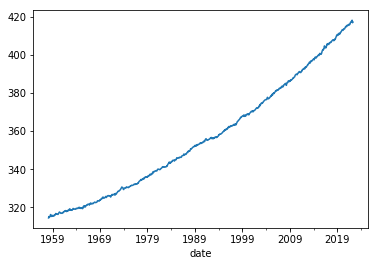

In [22]:
data['seasonally adjusted filled'].plot()

## Analyse saisonnière

Nous allons utiliser le module d'analyse saisonnière de `statsmodels` pour décomposer l'évolution de la concentration atmosphérique de CO2 en la somme d'une tendance et un motif périodique.

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

Nous devons indiquer la fréquence des observations à statsmodels

In [24]:
data.index = pd.DatetimeIndex(data.index.values, freq = 'MS')

In [25]:
data

Yr  Mn   Date       Date     CO2 seasonally adjusted     fit  \
1958-03-01  1958  03  21259  1958.2027  315.71              314.44  316.19   
1958-04-01  1958  04  21290  1958.2877  317.45              315.16  317.29   
1958-05-01  1958  05  21320  1958.3699  317.51              314.70  317.87   
1958-06-01  1958  06  21351  1958.4548     NaN                 NaN  317.25   
1958-07-01  1958  07  21381  1958.5370  315.86              315.20  315.85   
1958-08-01  1958  08  21412  1958.6219  314.93              316.21  313.97   
1958-09-01  1958  09  21443  1958.7068  313.21              316.10  312.44   
1958-10-01  1958  10  21473  1958.7890     NaN                 NaN  312.43   
1958-11-01  1958  11  21504  1958.8740  313.33              315.20  313.60   
1958-12-01  1958  12  21534  1958.9562  314.67              315.43  314.76   
1959-01-01  1959  01  21565  1959.0411  315.58              315.52  315.64   
1959-02-01  1959  02  21596  1959.1260  316.49              315.84  316.28   
1959-03-01  1959  03  21624  1959.2027  316.65              315.37  316.98   
1959-04-01  1959  04  21655  1959.2877  317.72              315.42  318.08   
1959-05-01  1959  05  21685  1959.3699  318.29              315.48  318.66   
1959-06-01  1959  06  21716  1959.4548  318.15              316.02  318.05   
1959-07-01  1959  07  21746  1959.5370  316.54              315.87  316.66   
1959-08-01  1959  08  21777  1959.6219  314.80              316.08  314.80   
1959-09-01  1959  09  21808  1959.7068  313.84              316.74  313.30   
1959-10-01  1959  10  21838  1959.7890  313.33              316.33  313.32   
1959-11-01  1959  11  21869  1959.8740  314.81              316.69  314.53   
1959-12-01  1959  12  21899  1959.9562  315.58              316.35  315.72   
1960-01-01  1960  01  21930  1960.0410  316.43              316.37  316.62   
1960-02-01  1960  02  21961  1960.1257  316.98              316.33  317.29   
1960-03-01  1960  03  21990  1960.2049  317.58              316.27  318.03   
1960-04-01  1960  04  22021  1960.2896  319.03              316.70  319.14   
1960-05-01  1960  05  22051  1960.3716  320.03              317.21  319.68   
1960-06-01  1960  06  22082  1960.4563  319.58              317.46  319.02   
1960-07-01  1960  07  22112  1960.5383  318.18              317.53  317.59   
1960-08-01  1960  08  22143  1960.6230  315.90              317.22  315.67   
...          ...  ..    ...        ...     ...                 ...     ...   
2019-11-01  2019  11  43784  2019.8740  410.16              412.43  410.15   
2019-12-01  2019  12  43814  2019.9562  411.81              412.74  411.69   
2020-01-01  2020  01  43845  2020.0410  413.30              413.24  412.90   
2020-02-01  2020  02  43876  2020.1257  414.05              413.27  413.81   
2020-03-01  2020  03  43905  2020.2049  414.45              412.88  414.80   
2020-04-01  2020  04  43936  2020.2896  416.11              413.31  416.24   
2020-05-01  2020  05  43966  2020.3716  417.15              413.76  417.01   
2020-06-01  2020  06  43997  2020.4563  416.29              413.74  416.34   
2020-07-01  2020  07  44027  2020.5383  414.42              413.64  414.75   
2020-08-01  2020  08  44058  2020.6230  412.52              414.10  412.60   
2020-09-01  2020  09  44089  2020.7077  411.18              414.69  410.88   
2020-10-01  2020  10  44119  2020.7896  411.12              414.73  411.01   
2020-11-01  2020  11  44150  2020.8743  412.88              415.15  412.55   
2020-12-01  2020  12  44180  2020.9563  413.89              414.81  414.06   
2021-01-01  2021  01  44211  2021.0411  415.15              415.08  415.23   
2021-02-01  2021  02  44242  2021.1260  416.47              415.69  416.12   
2021-03-01  2021  03  44270  2021.2027  417.16              415.62  417.04   
2021-04-01  2021  04  44301  2021.2877  418.24              415.46  418.45   
2021-05-01  2021  05  44331  2021.3699  418.95              415.55  419.23   
2021-06-01  2021  06  44362  2021.45

In [26]:
result = seasonal_decompose(data['seasonally adjusted filled'], model='ad')

Visualisons les résultats. Deux graphiques apparaissent à cause du notebook mais les deux sont absolument indentiques.

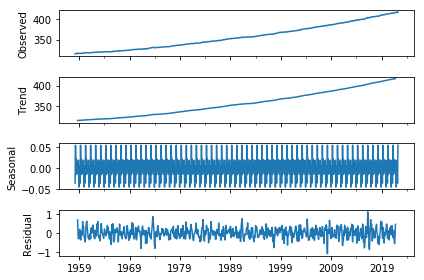

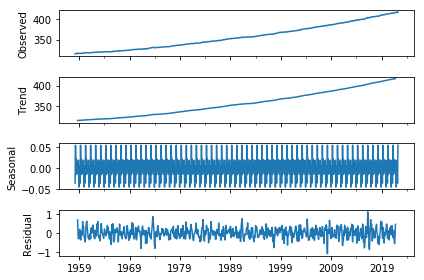

In [28]:
%matplotlib inline
result.plot()